In [5]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np
import pandas as pd
SEED = 777

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder
features_target = ['target'] 

for feature in features_target:
    le = LabelEncoder()
    le.fit(train_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    
print(train_df['target'].head())

0    5
1    5
2    1
3    7
4    1
Name: target, dtype: int64


In [38]:
train_no_predict = train_df.drop(['id', 'target'], 1)
train_predict = train_df['target']

train_percent = 0.50

X_train, X_test, y_train, y_test = train_test_split(train_no_predict, train_predict, stratify=train_predict, 
                                                    train_size=train_percent, random_state=SEED)
print('train count: ', len(y_train))
print('test count: ', len(y_test))

train count:  100000
test count:  100000


In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
important_features_dict = {}
for idx, val in enumerate(model.coef_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

for idx, val in enumerate(important_features_list):
    feature_name = X_train.columns[val]
    feature_value = model.coef_[val]
    print(feature_name + ': ' + str(round(feature_value, 3)))

feature_18: 0.051
feature_12: 0.034
feature_16: 0.029
feature_30: 0.029
feature_14: 0.027
feature_37: 0.026
feature_53: 0.023
feature_44: 0.023
feature_56: 0.019
feature_52: 0.018
feature_8: 0.016
feature_31: 0.015
feature_45: 0.012
feature_7: 0.011
feature_23: 0.01
feature_43: 0.009
feature_21: 0.009
feature_35: 0.008
feature_4: 0.008
feature_64: 0.007
feature_1: 0.007
feature_50: 0.007
feature_48: 0.006
feature_65: 0.006
feature_40: 0.006
feature_58: 0.005
feature_34: 0.005
feature_72: 0.005
feature_9: 0.004
feature_2: 0.004
feature_57: 0.003
feature_66: 0.003
feature_25: 0.003
feature_0: 0.002
feature_13: 0.002
feature_54: 0.002
feature_67: 0.002
feature_19: 0.002
feature_60: 0.002
feature_55: 0.002
feature_62: 0.002
feature_29: 0.001
feature_42: 0.001
feature_3: 0.001
feature_10: 0.001
feature_70: 0.001
feature_68: 0.001
feature_46: 0.001
feature_22: 0.0
feature_39: 0.0
feature_73: 0.0
feature_61: 0.0
feature_28: -0.0
feature_51: -0.001
feature_63: -0.001
feature_32: -0.001
feature

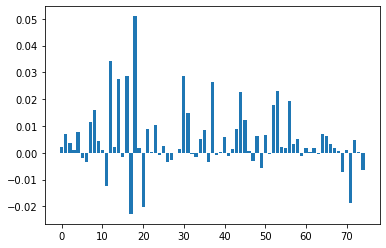

In [41]:
pyplot.bar([x for x in range(len(model.coef_))], model.coef_)
pyplot.show()

In [87]:
#feature_18: 0.051
#feature_12: 0.034
#feature_16: 0.029
#feature_30: 0.029
#feature_14: 0.027
#feature_37: 0.026
#feature_53: 0.023
#feature_44: 0.023

train_no_predict = train_df.drop(['id', 'target', 'feature_44'], 1)
train_predict = train_df['feature_44']

train_percent = 0.50

X_train, X_test, y_train, y_test = train_test_split(train_no_predict, train_predict, stratify=train_predict, 
                                                    train_size=train_percent, random_state=SEED)
print('train count: ', len(y_train))
print('test count: ', len(y_test))

train count:  100000
test count:  100000


In [88]:
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('R^2: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 8.01
R^2: 0.09


<AxesSubplot:ylabel='feature_18'>

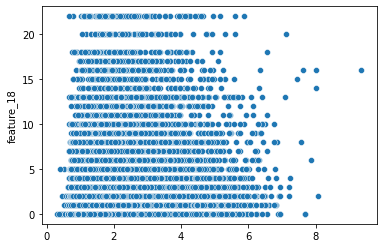

In [73]:
sns.scatterplot(x=y_pred, y=y_test)

In [76]:
# lol too many points, runs too long
#sns.swarmplot(x=y_pred, y=y_test)